In [1]:
import tensorflow as tf
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

2023-02-11 18:35:22.798155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Create random data between (-10, 10) and determine groundtruth
# GroundTruth Function: y = cos(x)
torch.random.manual_seed(1)
simIn = 20 * torch.rand((1000, 1)) - 10
groundTruth = np.cos(simIn)

In [3]:
# Calculate the number of parameters in a neural network
def calculate_parameters(inputModel):
    val = sum(params.numel() for params in inputModel.parameters() if params.requires_grad)
    return val

In [4]:
# Set up NN for MNIST training - 3 Hidden layer, 131 parameters Middle model not shallow not deep
class NNGradient(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 5)
        self.fc2 = nn.Linear(5, 10)
        self.fc3 = nn.Linear(10, 5)
        self.fc4 = nn.Linear(5, 1)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = self.fc4(val)
        return val

In [5]:
# Set up necessary auxilaries for neural net training
net_gradient = NNGradient()
costFun = nn.MSELoss()
opt = optim.Adam(net_gradient.parameters(), lr=0.001)
EPOCHS = 1000
calculate_parameters(net_gradient)

131

In [6]:
# Train Network 
costList = []
gradientNormalList = []
cList = []
c = 1
for index in range(EPOCHS):
    cList.append(c)
    c += 1
    net_gradient.zero_grad()
    output = net_gradient(simIn)
    cost = costFun(output, groundTruth)
    with torch.no_grad():
        c1 = costFun(output, groundTruth)
    costList.append(c1)
    cost.backward()
    opt.step() 
    
    # Get gradient norm (L2 norm)
    gradAll = 0.0
    for p in net_gradient.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy() ** 2).sum()
        gradAll += grad
    gradNorm = gradAll ** 0.5
    gradientNormalList.append(gradNorm)

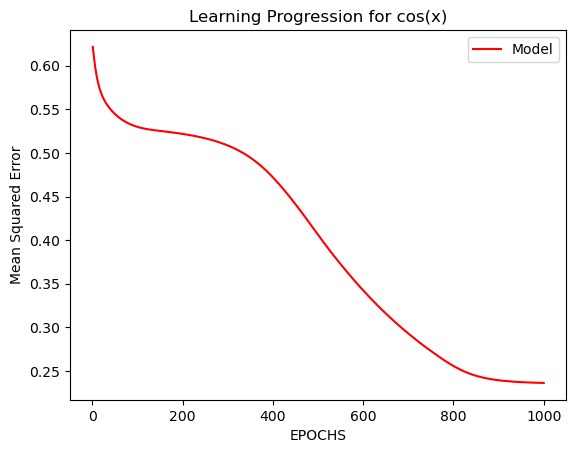

In [7]:
# Visulaize Training process of cos function
plt.plot(cList, costList, 'r', label='Model')
plt.title("Learning Progression for cos(x)")
plt.xlabel("EPOCHS")
plt.ylabel("Mean Squared Error")
plt.legend(loc="upper right")
plt.show()

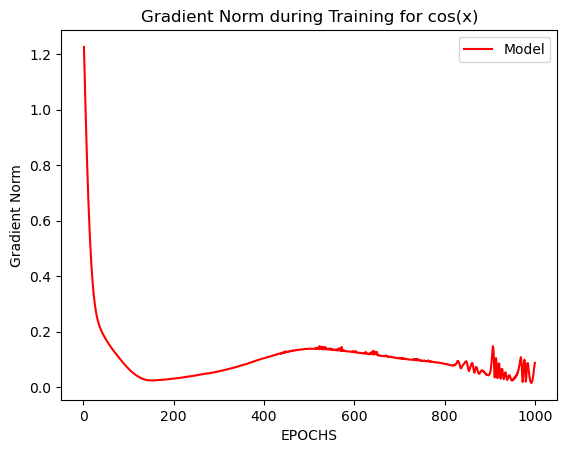

In [8]:
# Visulaize Gradient Norm of cos function during training
plt.plot(cList, gradientNormalList, 'r', label='Model')
plt.title("Gradient Norm during Training for cos(x)")
plt.xlabel("EPOCHS")
plt.ylabel("Gradient Norm")
plt.legend(loc="upper right")
plt.show()